# Part 1: Load & Explore

In [3]:
# ================================
# PART 1: Load, Explore, Clean, Save
# ================================

import pandas as pd

# Load the dataset (first 10,000 rows for speed)
df = pd.read_csv("metadata.csv", nrows=10000, low_memory=False)

# Basic exploration
print("Data shape:", df.shape)
print("\nColumn info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())

# ----------------
# Cleaning
# ----------------

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year for time-based analysis
df['year'] = df['publish_time'].dt.year

# Create abstract word count
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Drop rows missing important info (title or publish_time)
df_clean = df.dropna(subset=['title', 'publish_time'])

print("\nCleaned data shape:", df_clean.shape)
print("\nFirst 5 cleaned rows:")
print(df_clean.head())

# ----------------
# Save cleaned dataset
# ----------------

df_clean.to_csv("metadata_clean.csv", index=False)
print("\nCleaned dataset saved as 'metadata_clean.csv'. You can use this for analysis and Streamlit.")

Data shape: (10000, 19)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          10000 non-null  object 
 1   sha               9010 non-null   object 
 2   source_x          10000 non-null  object 
 3   title             10000 non-null  object 
 4   doi               10000 non-null  object 
 5   pmcid             10000 non-null  object 
 6   pubmed_id         10000 non-null  int64  
 7   license           10000 non-null  object 
 8   abstract          7855 non-null   object 
 9   publish_time      10000 non-null  object 
 10  authors           9406 non-null   object 
 11  journal           9953 non-null   object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          0 non-null      float64
 15  pdf_json_files    9010 non-null   object 
 16  pmc

# Part 2: Data Cleaning & Preparation

In [4]:
# ================================
# PART 2: Data Cleaning & Preparation
# ================================

import pandas as pd

# Load the cleaned dataset from Part 1
df = pd.read_csv("metadata_clean.csv", low_memory=False)

# -----------------------------
# Handle missing data
# -----------------------------
print("Missing values per column:")
print(df.isnull().sum())

# Columns with too many missing values can be dropped
# Example: mag_id, who_covidence_id, arxiv_id are all empty → drop
df.drop(columns=['mag_id', 'who_covidence_id', 'arxiv_id'], inplace=True)

# Fill missing abstracts with empty string (optional, for word counts)
df['abstract'] = df['abstract'].fillna("")

# Fill missing authors with 'Unknown'
df['authors'] = df['authors'].fillna("Unknown")

# Fill missing journal with 'Unknown'
df['journal'] = df['journal'].fillna("Unknown")

# -----------------------------
# Prepare data for analysis
# -----------------------------

# Convert publish_time to datetime if not already
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year for time-based analysis
df['year'] = df['publish_time'].dt.year

# Create a new column: abstract word count
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.split()))

# Preview cleaned data
print("\nCleaned and prepared data:")
print(df.head())

# Save prepared dataset for Part 3
df.to_csv("metadata_prepared.csv", index=False)
print("\nPrepared dataset saved as 'metadata_prepared.csv'. Ready for analysis & visualization.")


Missing values per column:
cord_uid                  0
sha                     858
source_x                  0
title                     0
doi                       0
pmcid                     0
pubmed_id                 0
license                   0
abstract               1925
publish_time              0
authors                 522
journal                  47
mag_id                 9078
who_covidence_id       9078
arxiv_id               9078
pdf_json_files          858
pmc_json_files         2385
url                       0
s2_id                  9078
year                      0
abstract_word_count       0
dtype: int64

Cleaned and prepared data:
   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5

# Part 3: Data Analysis & Visualization

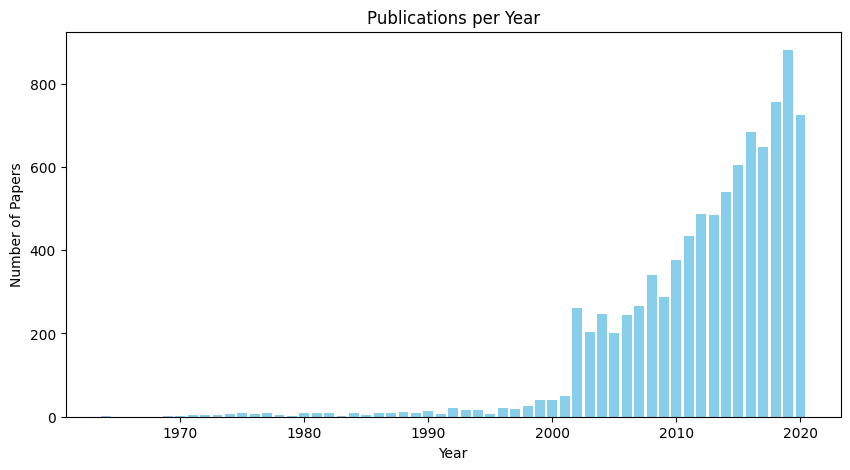

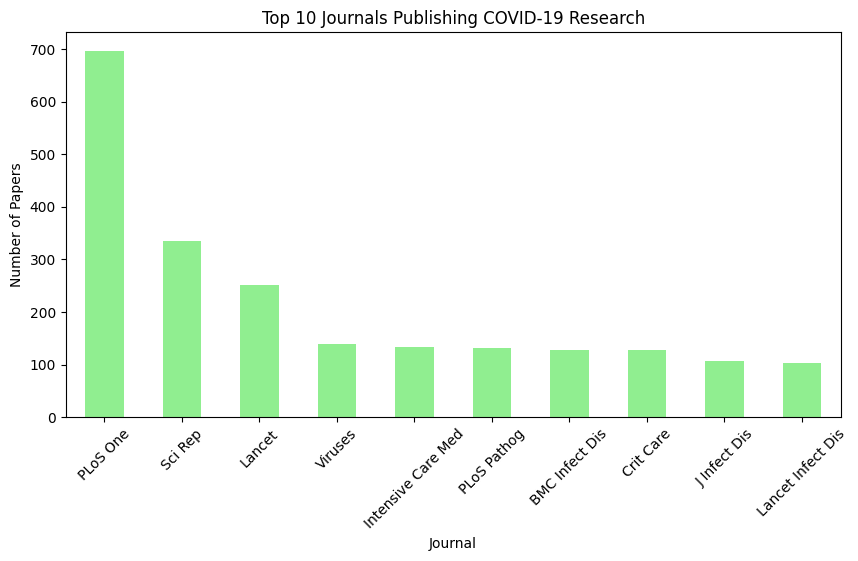

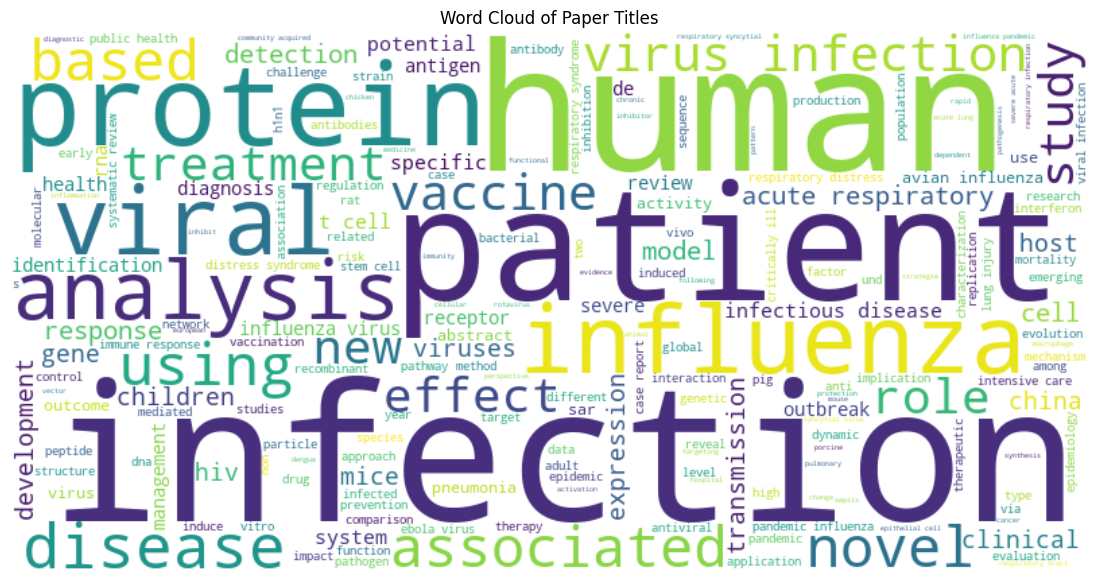

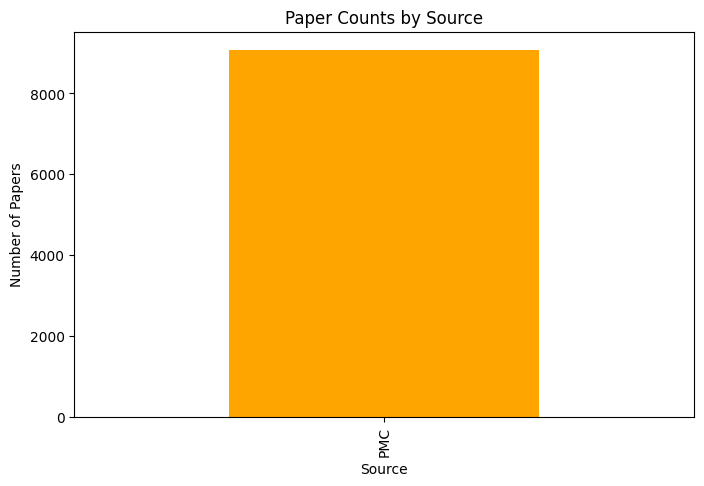

In [6]:
# ================================
# PART 3: Analysis & Visualization
# ================================

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the prepared dataset
df = pd.read_csv("metadata_prepared.csv", low_memory=False)

# -----------------------------
# 1. Publications per Year
# -----------------------------
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.title("Publications per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

# -----------------------------
# 2. Top 10 Journals
# -----------------------------
top_journals = df['journal'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_journals.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Journal")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 3. Word Cloud of Titles
# -----------------------------
all_titles = " ".join(df['title'].dropna()).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Paper Titles")
plt.show()

# -----------------------------
# 4. Paper Counts by Source
# -----------------------------
source_counts = df['source_x'].value_counts()
plt.figure(figsize=(8,5))
source_counts.plot(kind='bar', color='orange')
plt.title("Paper Counts by Source")
plt.xlabel("Source")
plt.ylabel("Number of Papers")
plt.show()

# Part 4: Streamlit Application

The interactive Streamlit app for exploring the CORD-19 dataset is implemented in `app.py`.  
It includes:
- Publications per year with an interactive slider
- Top 10 journals publishing COVID-19 research
- Word cloud of paper titles
- Distribution of papers by source
- A table showing sample papers

To run the app, use the following command in your terminal:

```bash
streamlit run app.py